In [29]:
import psycopg2
import sys
import pprint
import pandas
import random

In [30]:
def connect():
    "return a connection"
    conn_string = "host='localhost' dbname='mimic' user='postgres'"
    conn = psycopg2.connect(conn_string)
    return conn
    
def disconnect(conn):
    "disconnect"
    conn.commit()
    conn.close()

def get_data( query, itersize=10000):
    "return a pandas dataframe with columns names"
    conn = connect()
    cur = conn.cursor(f'tmpCursor')
    cur.itersize = itersize
    cur.execute(query)
    pd = pandas.DataFrame(cur.fetchall(),columns= [desc[0] for desc in cur.description])
    cur.close()
    disconnect(conn)
    return pd


In [ ]:
print(get_data("select itemid from mimiciii.d_items where lower(label) like '%evophed%' or lower(label) like '%pressin%' or lower(label) like '%ephrin%' "))

In [84]:
 print(get_data("SELECT table_schema, table_name FROM information_schema.tables WHERE table_schema IN (  'mimiciii')"))

   table_schema          table_name
0      mimiciii    d_icd_procedures
1      mimiciii          admissions
2      mimiciii             callout
3      mimiciii          caregivers
4      mimiciii       chartevents_1
5      mimiciii       chartevents_2
6      mimiciii       chartevents_3
7      mimiciii       chartevents_4
8      mimiciii       chartevents_5
9      mimiciii       chartevents_6
10     mimiciii       chartevents_7
11     mimiciii       chartevents_8
12     mimiciii       chartevents_9
13     mimiciii      chartevents_10
14     mimiciii      chartevents_11
15     mimiciii      chartevents_12
16     mimiciii      chartevents_13
17     mimiciii      chartevents_14
18     mimiciii         chartevents
19     mimiciii           cptevents
20     mimiciii      datetimeevents
21     mimiciii       diagnoses_icd
22     mimiciii            drgcodes
23     mimiciii               d_cpt
24     mimiciii     d_icd_diagnoses
25     mimiciii             d_items
26     mimiciii          d_l

In [83]:
 print(get_data("SELECT * FROM sepsis.general_vars LIMIT 10"))

   subject_id  hadm_id
0           2   163353
1           3   145834
2           4   185777
3           5   178980
4           6   107064
5           7   118037
6           8   159514
7           9   150750
8          10   184167
9          11   194540


In [148]:
ref = get_data("SELECT * FROM mimiciii.d_items WHERE label ~* 'temp' AND linksto = 'chartevents'")
print(ref)
ref.to_csv('ITEMS_TEMP_20170606.csv')

    row_id  itemid                                              label  \
0      548     591                                  RLE [Temperature]   
1      554     597                                  RUE [Temperature]   
2      384     417                                  Inspired Gas Temp   
3      391     424                                         LLE [Temp]   
4      394     427                                         LUE [Temp]   
5      598     645                                 Skin [Temperature]   
6      626     674                                         Temp. Site   
7      627     676                                      Temperature C   
8      628     677                               Temperature C (calc)   
9      629     678                                      Temperature F   
10     630     679                               Temperature F (calc)   
11    1053    3460                               Humidity Temp [Meas]   
12    1740    5632                                R

In [145]:
def inStmt(col):
    "generates list"
    return ','.join(col.map(str))

In [147]:
cardiac_index = pandas.read_csv("ITEMS_CARDIAC_INDEX_201511111831.csv")
mean_pressure = pandas.read_csv("ITEMS_MEAN_PRESSURE_201511111723.csv")
systol_pressure = pandas.read_csv("ITEMS_SYSTOL_PRESSURE_201511111657-3.csv")
thromb = pandas.read_csv("ITEMS_THROMB_201511111845.csv")
venus_sat = pandas.read_csv("ITEMS_VENUS_SAT_201511111810.csv")
weight = pandas.read_csv("ITEMS_WEIGHT_20170606.csv")
tmp = weight[weight['valid'] == True]
print(inStmt(tmp['itemid']))


763,3580,3581,3582,3583,3693,224639


In [38]:
ci=cardiac_index[cardiac_index['valid'] == True]
mp=mean_pressure[mean_pressure['valid'] == True]
sp=systol_pressure[systol_pressure['valid'] == True]
th=thromb[thromb['valid'] == True]
vs=venus_sat[venus_sat['valid'] == True]

In [77]:
import pylab as plt
from matplotlib_venn import venn3
sepsis_sql = get_data('SELECT distinct hadm_id FROM sepsis.angus2013_sepsis')
sepsis_severe_sql = get_data('SELECT distinct hadm_id FROM sepsis.angus2013_sepsis_severe')
#sepsis_shock_sql = get_data('SELECT distinct hadm_id FROM sepsis.angus2013_sepsis_shock' )
sepsis_shock_sql = get_data('SELECT distinct hadm_id FROM sepsis.angus2013_sepsis_shock' )
set1 = set(sepsis_sql['hadm_id'])
#idx = df['sepsis_angus']==1 
set2 = set(sepsis_severe_sql['hadm_id']) 
#idx = df['sofa']>=2 
set3 = set(sepsis_shock_sql['hadm_id'])
set3=set2


In [67]:
print(get_data('SELECT count(1)  FROM sepsis.angus2013_sepsis_severe WHERE hadm_id NOT IN (SELECT hadm_id FROM sepsis.angus2013_sepsis)'))

   count
0      0


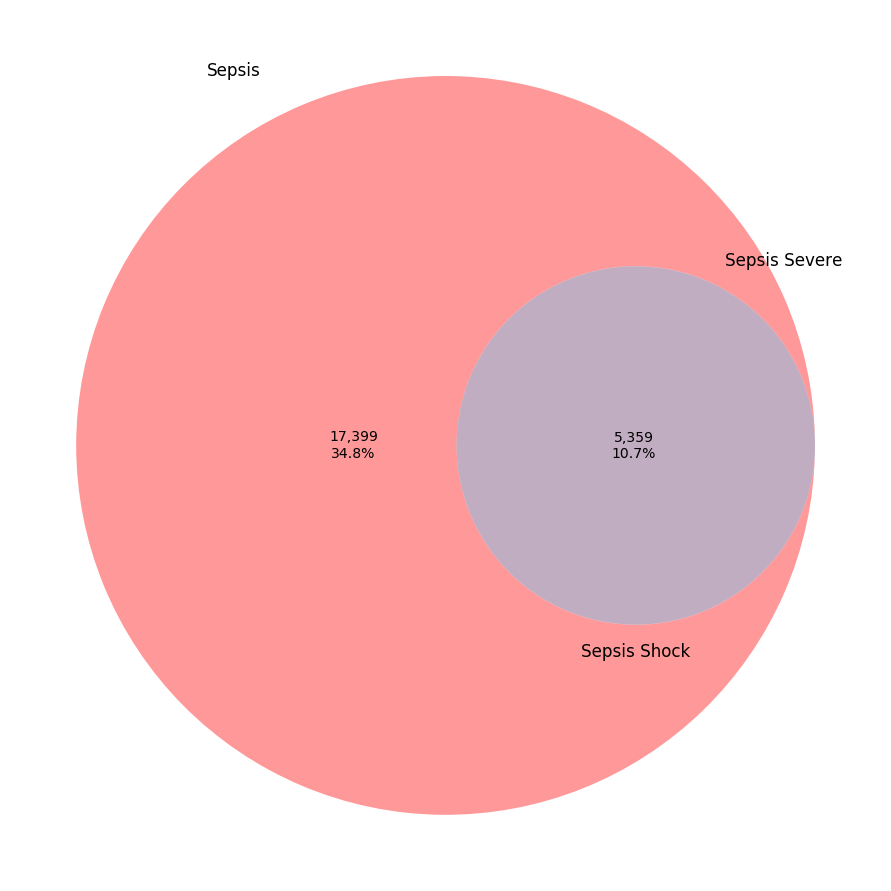

In [81]:
plt.figure(figsize=[16,16])
plt.rcParams.update({'font.size': 14})
venn3([set1, set2, set3], ('Sepsis', 'Sepsis Severe', 'Sepsis Shock'),      
subset_label_formatter=lambda x: '{:,}\n{:2.1f}%'.format(x, x*100.0/50000))
plt.savefig('sepsis3-venn.png')
plt.show()